In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
taxi_data = pd.read_csv('TaxiData.csv')
taxi_data

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,8.0,3.25,5,11,5,1431602100,41.904935,-87.649907,41.904935,-87.649907,0.0,NaN,1.703184e+10,Cash,Taxi Affiliation Services,60.0,8.0,0.0
14998,8.0,3.25,11,16,4,1385568900,41.904935,-87.649907,41.904935,-87.649907,0.0,NaN,1.703184e+10,Cash,Taxi Affiliation Services,0.0,8.0,0.0
14999,8.0,4.25,12,13,3,1449579600,41.904935,-87.649907,41.904935,-87.649907,0.3,NaN,1.703184e+10,Cash,NaN,180.0,8.0,0.0
15000,61.0,9.85,9,15,6,1410534000,41.809018,-87.659167,41.829922,-87.672503,3.0,NaN,NaN,Cash,Taxi Affiliation Services,780.0,59.0,0.0


In [4]:
# remove all rows with fare = 0
# taxi_data = taxi_data[taxi_data['fare'] > 0]

## 3.a\) Fare and Tip Distribution 

In [5]:
taxi_fare = taxi_data['fare']
taxi_fare

0        12.45
1         0.00
2        27.05
3         5.85
4        16.65
         ...  
14997     3.25
14998     3.25
14999     4.25
15000     9.85
15001     7.45
Name: fare, Length: 15002, dtype: float64

In [6]:
taxi_fare.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15002 entries, 0 to 15001
Series name: fare
Non-Null Count  Dtype  
--------------  -----  
15002 non-null  float64
dtypes: float64(1)
memory usage: 117.3 KB


In [7]:
# plot histrogram
def plot_hist(data, bins, color, title, xlabel, ylabel):
    plt.hist(data, bins=bins, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


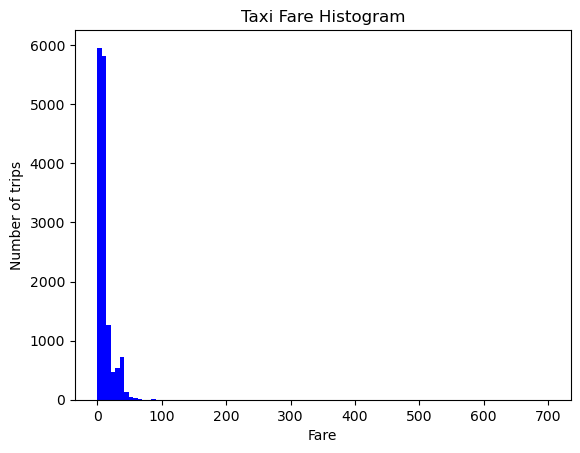

In [8]:
plot_hist(taxi_fare, 100, 'blue', 'Taxi Fare Histogram', 'Fare', 'Number of trips')

In [9]:
taxi_tip = taxi_data['tips']
taxi_tip

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14997    0.0
14998    0.0
14999    0.0
15000    0.0
15001    0.0
Name: tips, Length: 15002, dtype: float64

In [10]:
taxi_tip.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15002 entries, 0 to 15001
Series name: tips
Non-Null Count  Dtype  
--------------  -----  
15002 non-null  float64
dtypes: float64(1)
memory usage: 117.3 KB


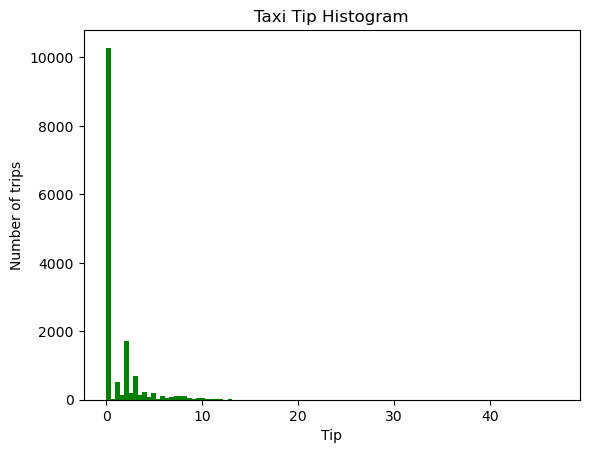

In [11]:
plot_hist(taxi_tip, 100, 'green', 'Taxi Tip Histogram', 'Tip', 'Number of trips')

In [12]:
def plot_box(data, color, title, xlabel, ylabel):
    sns.boxplot(data, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    

In [14]:
import plotly.express as px

In [15]:
taxi_fare_box = px.box(taxi_data, y='fare', title='Taxi Fare Boxplot')
taxi_fare_box.show()

In [16]:
taxi_tip_box = px.box(taxi_data, y='tips', title='Taxi Tip Boxplot')
taxi_tip_box.show()

Assuming by data, the question 3.a.(b) meant only the fare and tip distribution for this part, considering it is the heading for the subpart.

In [17]:
# range of fare
print('Range of Fare: [', taxi_fare.min(),',',taxi_fare.max(), ']')
print('Range of Tip: [', taxi_tip.min(),',',taxi_tip.max(), ']')

Range of Fare: [ 0.0 , 700.07 ]
Range of Tip: [ 0.0 , 47.0 ]


We can identify outliers and clusters in their scatter plots

Text(0, 0.5, 'Tip')

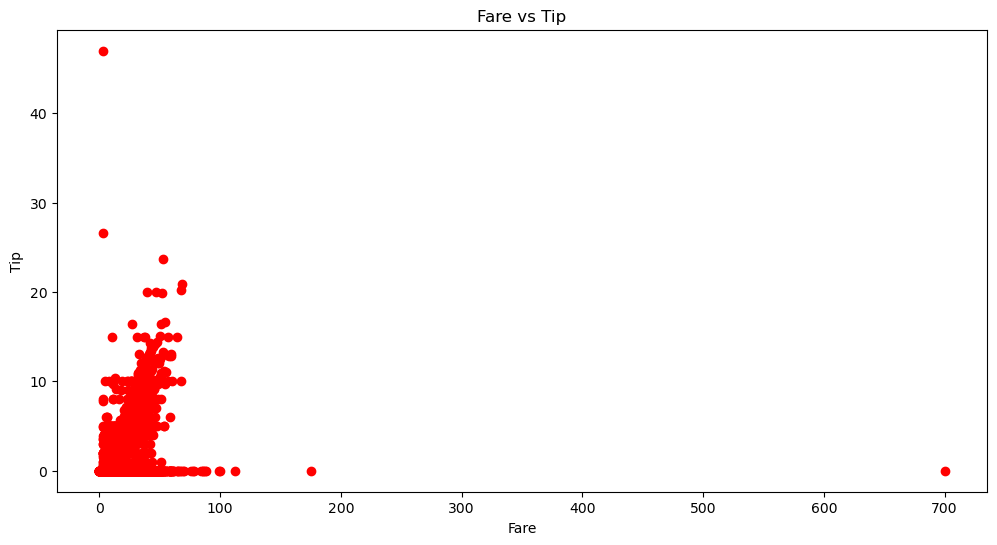

In [18]:
# plot tips and fare in a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x=taxi_data['fare'], y=taxi_data['tips'], color='red')

plt.title('Fare vs Tip')
plt.xlabel('Fare')
plt.ylabel('Tip')



As we can observe from the scatter plot, fares are clustered in the range [0,50], while tips are clustered in the range [0,10].

Outliers : </br>
<ul>
<li> Outliers in fare can be seen near fare = 700, 200
<li> OUtliers in tips can be seen tips = 40, 30
</ul>

In [19]:
taxi_fare.describe()

count    15002.000000
mean        11.768216
std         11.538850
min          0.000000
25%          5.850000
50%          7.850000
75%         12.450000
max        700.070000
Name: fare, dtype: float64

We can observe from the statistical analysis, that most fares are clustered in the range from 0 to 20, based on the mean and std dev of the taxi fares. There are some outliers, like the maximum fare which is 700.

In [20]:
taxi_tip.describe()

count    15002.000000
mean         1.076674
std          2.158340
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         47.000000
Name: tips, dtype: float64

In [21]:
taxi_tip[taxi_tip == 0].count()

10259

In [22]:
taxi_tip.count()

15002

In [23]:
taxi_tip[taxi_tip == 0].count() / taxi_tip.count()

0.6838421543794161

In [24]:
# take the mean of the taxi tip/fare for record
taxi_data['tip_percent'] = taxi_data['tips'] / taxi_data['fare']
taxi_data['tip_percent'].mean()

0.0866596873296386

Tips are clustered around the range [0, 3], with almost 68% being 0. However there are some outliers, like the max tip which is 47. This tells us that getting a tip is rare, and even then they are usually a small fraction of the actual fare, averaging approximately 0.087 of the actual fare.

The histograms looked a lot skewed which is because of the outliers. So we can try removing these outliers to get a better histogram

In [ ]:
# remove the outlier in trip fares and tips with tips>3 and fare >100
taxi_fare = taxi_fare[taxi_fare < 100]
taxi_tip = taxi_tip[taxi_tip < 3]

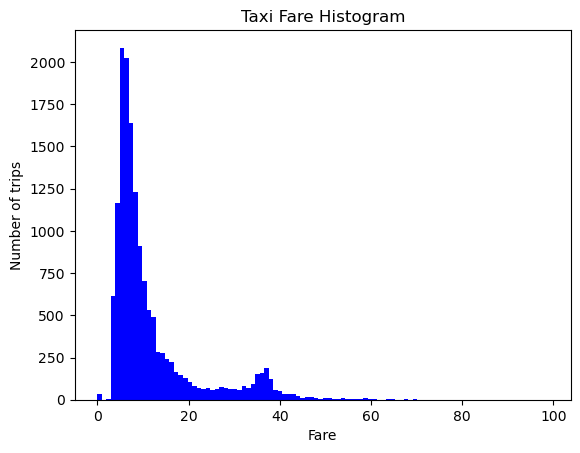

In [26]:
plot_hist(taxi_fare, 100, 'blue', 'Taxi Fare Histogram', 'Fare', 'Number of trips')

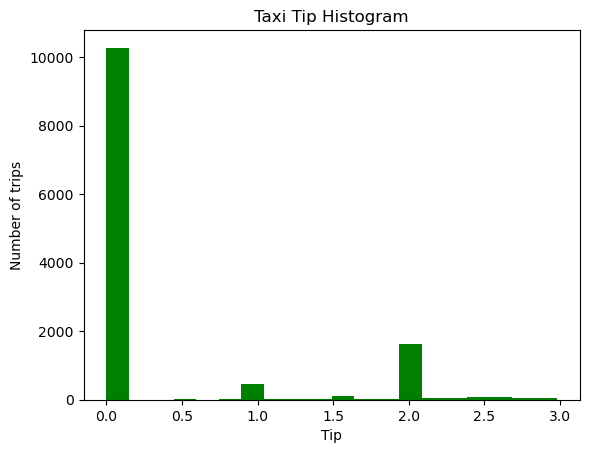

In [27]:
plot_hist(taxi_tip, 20, 'green', 'Taxi Tip Histogram', 'Tip', 'Number of trips')

### 3.b Payment Method Insights

In [28]:
# get the count for each type of payment method
taxi_payment_methods = taxi_data['payment_type']
taxi_payment_methods.value_counts()

payment_type
Cash           9909
Credit Card    4975
No Charge        81
Unknown          29
Dispute           4
Pcard             3
Prcard            1
Name: count, dtype: int64

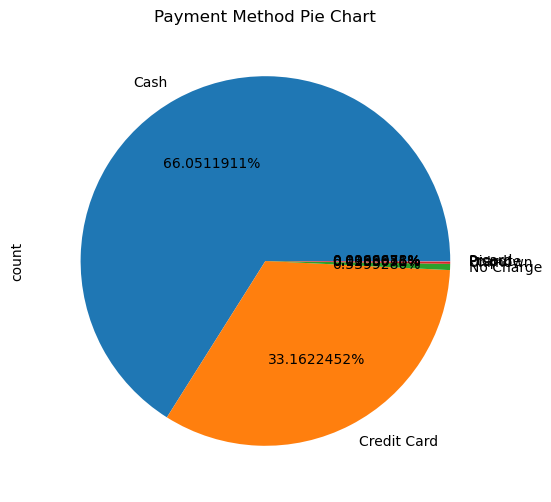

In [29]:
# plot the pie chart for the payment method
plt.figure(figsize=(12, 6))
taxi_payment_methods.value_counts().plot.pie(autopct='%0.7f%%')
plt.title('Payment Method Pie Chart')
plt.show()

Since, number of payments using some payment methods like Pcard, Prcard and Dispute are really low compared to the the other payment methods, hence using a bar chart might be a better way to visualise it than a pie chart, since a pie plot causes ovewriting

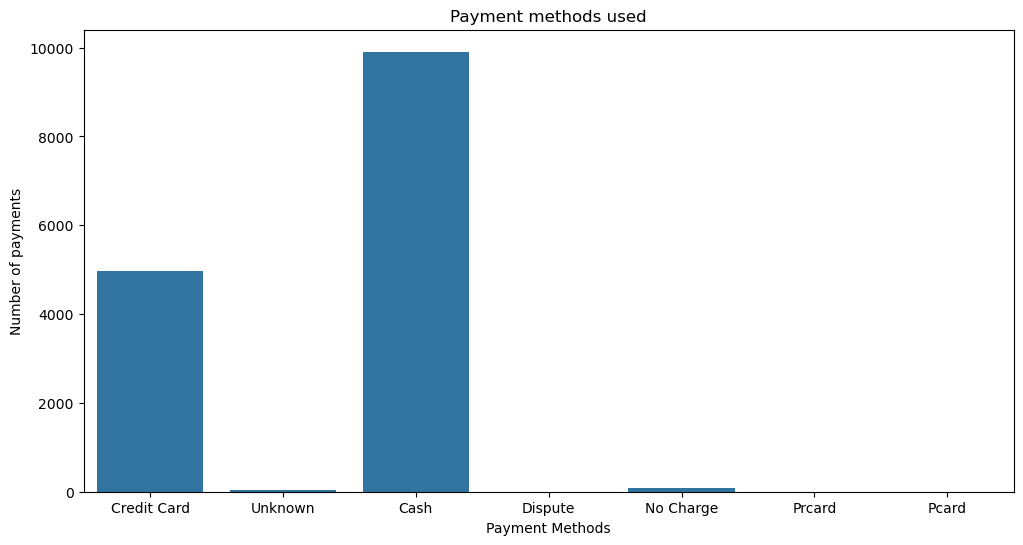

In [30]:
# plot the count of each payment method in a bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x = taxi_payment_methods)
plt.title('Payment methods used')
plt.xlabel('Payment Methods')
plt.ylabel('Number of payments')
plt.show()

In [31]:
# get the percentages of each payment method
taxi_payment_methods.value_counts() / taxi_payment_methods.count()

payment_type
Cash           0.660512
Credit Card    0.331622
No Charge      0.005399
Unknown        0.001933
Dispute        0.000267
Pcard          0.000200
Prcard         0.000067
Name: count, dtype: float64

From the bar chart and these percentages, we can clearly see that Cash is the most dominant payment method followed by Credit Card both of which constitute for almost 99% percent of all payments. Hence, it makes logical sense for service providers to keep change since, most of the fares are in decimals and cash being the prevalent payment method means most transactions would require these service providers to return change. Another insight can be that service providers should be able to accept credit card transactions since they also constitute a major portion of the transactions (almsot 1/3rd)

### 3.c Tips by Payment Method

In [32]:
import plotly.graph_objects as go

In [33]:
cash_payment = taxi_data[taxi_data['payment_type'] == 'Cash']['tips']
credit_card_payment = taxi_data[taxi_data['payment_type'] == 'Credit Card']['tips']
no_charge_payment = taxi_data[taxi_data['payment_type'] == 'No Charge']['tips']
dispute_payment = taxi_data[taxi_data['payment_type'] == 'Dispute']['tips']
unknown_payment = taxi_data[taxi_data['payment_type'] == 'Unknown']['tips']
pcard_payment = taxi_data[taxi_data['payment_type'] == 'Pcard']['tips']
prcard_payment = taxi_data[taxi_data['payment_type'] == 'Prcard']['tips']

fig = go.Figure()
fig.add_trace(go.Box(y=cash_payment, name='cash',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=credit_card_payment, name = 'credit card',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=no_charge_payment, name = 'no charge',
                marker_color = 'blue'))
fig.add_trace(go.Box(y=dispute_payment, name = 'dispute',
                marker_color = 'green'))
fig.add_trace(go.Box(y=unknown_payment, name = 'unknown',
                marker_color = 'purple'))
fig.add_trace(go.Box(y=pcard_payment, name = 'pcard',
                marker_color = 'orange'))
fig.add_trace(go.Box(y=prcard_payment, name = 'prcard',
                marker_color = 'black'))


fig.show()

In [34]:
# average tips for each payment method
taxi_data.groupby('payment_type')['tips'].mean()

payment_type
Cash           0.001519
Credit Card    3.239668
Dispute        0.000000
No Charge      0.000000
Pcard          0.000000
Prcard         0.000000
Unknown        0.685172
Name: tips, dtype: float64

From the interactive boxplot, we can see a different picture as most of the tips have credit card as the payment method, while the average tips by cash are quite low, with the unknown average being more than cash average.

In [35]:
taxi_data[taxi_data['tips']!=0].groupby('payment_type')['tips'].mean()

payment_type
Cash           3.762500
Credit Card    3.406753
Unknown        2.483750
Name: tips, dtype: float64

However, if we remove the transactions with no tips, we can see the the cash average is comparable to the credit card average, also being more than it.

In [36]:
taxi_data.groupby('payment_type')['tips'].count()

payment_type
Cash           9909
Credit Card    4975
Dispute           4
No Charge        81
Pcard             3
Prcard            1
Unknown          29
Name: tips, dtype: int64

In [37]:
taxi_data[taxi_data['tips']!=0].groupby('payment_type')['tips'].count()

payment_type
Cash              4
Credit Card    4731
Unknown           8
Name: tips, dtype: int64

We can see that in the transactions where non-zero tips are involved, they are either in the form of cash, credit card or unknown and nothing else. In the case of cash, inspite of the huge number of transactions, the number of transactions with a non-zero are only 4.

In [38]:
# percentage of tips where tips are not zero by payment method by total tips
taxi_data[taxi_data['tips']!=0].groupby('payment_type')['tips'].count() / taxi_data.groupby('payment_type')['tips'].count()

payment_type
Cash           0.000404
Credit Card    0.950955
Dispute             NaN
No Charge           NaN
Pcard               NaN
Prcard              NaN
Unknown        0.275862
Name: tips, dtype: float64

Dispute, Nocharge, Pcard and Prcard are NaN here as there are no cases where a tip was given with them being the payment method. However, 95% of credit card transactions include a non-zero tip, whereas the same percentage for cash payment is quite low almost 0.04%, with 27% of unknown transactions having a non-zero tip.

### 3.d Fare vs. Distance

In [39]:
def plot_scatter(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    plt.scatter(x=data[x], y=data[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

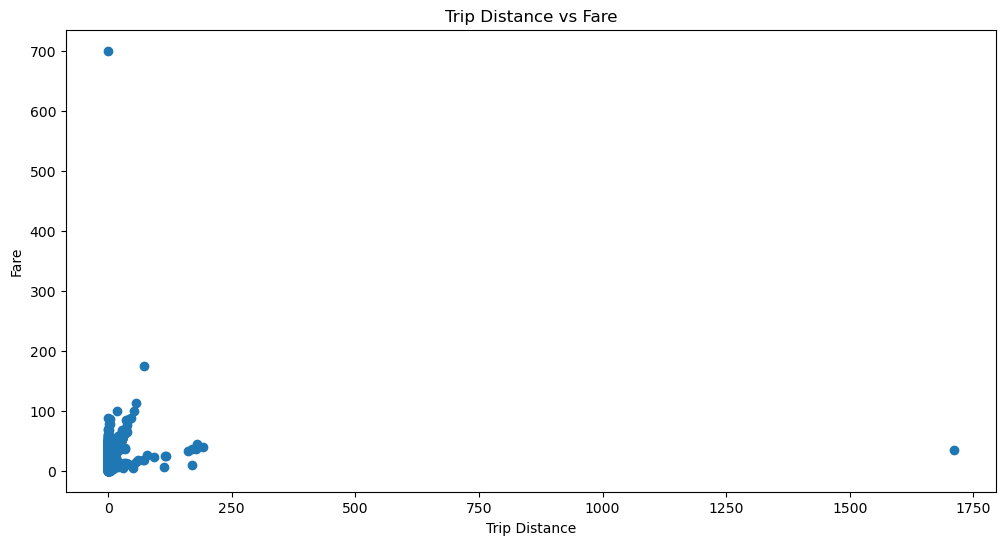

In [40]:
# scatter plot for trip distance vs fare
plot_scatter(taxi_data, 'trip_miles', 'fare', 'Trip Distance vs Fare', 'Trip Distance', 'Fare')


In [41]:
# correlation coefficient between trip distance and fare
dist_fare_corr = taxi_data['trip_miles'].corr(taxi_data['fare'])
dist_fare_corr

0.22380232969278896

In [42]:
trip_dist = taxi_data['trip_miles']
trip_dist.describe()

count    15002.000000
mean         2.872820
std         15.276007
min          0.000000
25%          0.000000
50%          1.000000
75%          2.500000
max       1710.000000
Name: trip_miles, dtype: float64

Taxi fare and distance are expected to be strongly correlated, but the above correlation coefficient suggests otherwise. This could be because of the two outliers, where trip_miles = 1710 and another where fare = 700.07. Lets remove these outliers and try again.

In [43]:
# remove the outlier in trip distance with trip_miles = 1710 and fare < 700
removed_outlier_taxi_data = taxi_data[taxi_data['trip_miles'] < 1710]
removed_outlier_taxi_data = removed_outlier_taxi_data[taxi_data['fare'] < 700]
removed_outlier_taxi_data

/tmp/ipykernel_97391/3574395523.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips,tip_percent
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0,NaN
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,8.0,3.25,5,11,5,1431602100,41.904935,-87.649907,41.904935,-87.649907,0.0,NaN,1.703184e+10,Cash,Taxi Affiliation Services,60.0,8.0,0.0,0.0
14998,8.0,3.25,11,16,4,1385568900,41.904935,-87.649907,41.904935,-87.649907,0.0,NaN,1.703184e+10,Cash,Taxi Affiliation Services,0.0,8.0,0.0,0.0
14999,8.0,4.25,12,13,3,1449579600,41.904935,-87.649907,41.904935,-87.649907,0.3,NaN,1.703184e+10,Cash,NaN,180.0,8.0,0.0,0.0
15000,61.0,9.85,9,15,6,1410534000,41.809018,-87.659167,41.829922,-87.672503,3.0,NaN,NaN,Cash,Taxi Affiliation Services,780.0,59.0,0.0,0.0


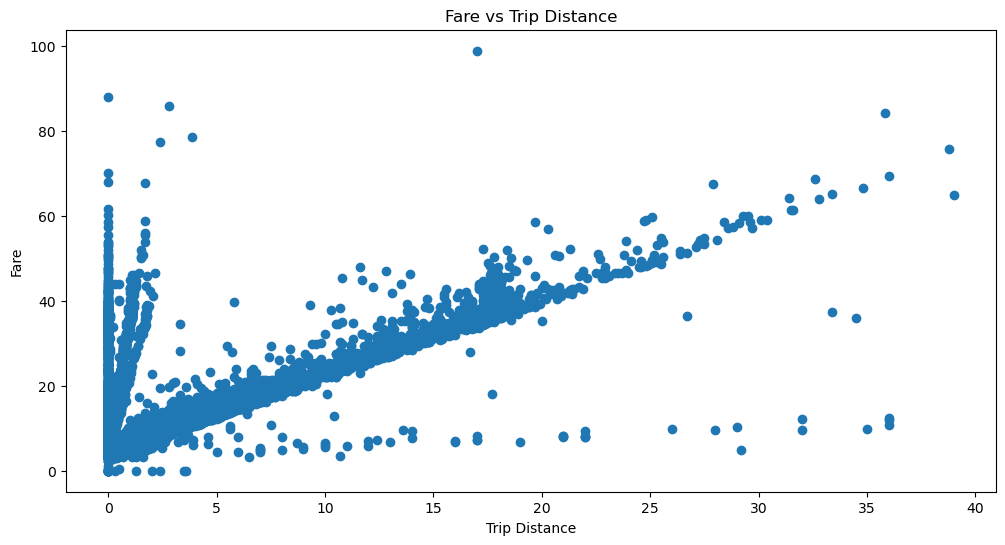

In [48]:
# plot scatter plot now
plot_scatter(removed_outlier_taxi_data, 'trip_miles', 'fare', 'Fare vs Trip Distance', 'Trip Distance', 'Fare')

There are still outliers, hence we can reduce the bound to 40 based on the above scatter plot. 

In [49]:
removed_outlier_taxi_data = removed_outlier_taxi_data[removed_outlier_taxi_data['trip_miles'] < 40]

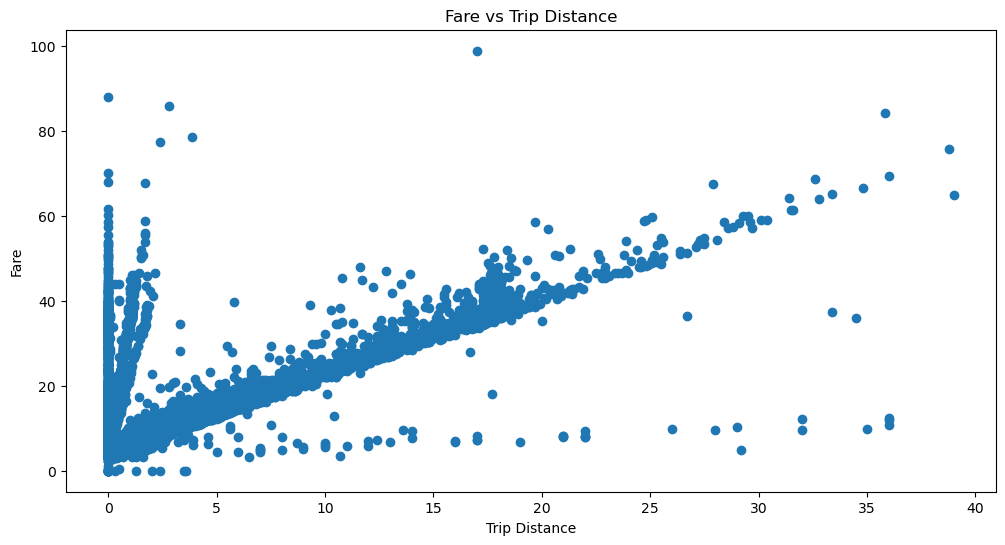

In [50]:
plot_scatter(removed_outlier_taxi_data, 'trip_miles', 'fare', 'Fare vs Trip Distance', 'Trip Distance', 'Fare')

The dense clustering at the bottom left corner suggests that the majority of trips are short distance, suggesting this taxi data could be from urban commute or local travel. 

In [51]:
# get the correlation coefficient between trip distance and fare for the data without the outliers
removed_outliers_dist_fare_corr = removed_outlier_taxi_data['trip_miles'].corr(removed_outlier_taxi_data['fare'])
removed_outliers_dist_fare_corr

0.7264399469507437

We can see that the correlation coefficient is much closer to the expected value, which is clear in the scatter plot, which is a lot more legible now. A correlation of 0.726 suggests a strong positive correlation, which means as distance increases, fare tends to increase as well. However, since the there is not a strong correlation, i.e. not close to 1, implies that there might be other factors as well which contribute to the fare. Generally longer trips result in higher fares.

However, there's considerable scatter/dispersion around this trend, there appear to be some outliers, particularly: </br>
<ul>
<li>Some high fares for relatively short distances
<li>A few very long trips with relatively low fares that seem unusual
</ul>

There are 5 discernable lines around which almost all of the data in the removed_outlier_taxi_data. These seem to imply there are majorly 5 values of slopes i.e. fare per trip distance. The line with almost 2 as the slope seems to be the one where the msot are centred around based on the scatter plot.